# NOTE: We have never actually learned how to get a Neural Network to predict FUTURE prices. I can't find anything on the subject (except for one day out).


# We might have to drop that part.

# Jeff you were right! "If it were that easy, wouldn't everyone be doing it". 

# Imports

# 1. Preprocess
* Get data from an API
* Filter out the data we don't need

* Scale the data
* Set up a train test split on the data

In [1621]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas as hvplot
plt.style.use('seaborn')

# Note on "prepost". If True, then strategy does better.
## Strategy performs much better than buy and hold when using shorter time frames.
I believe this is because no matter when you buy using the strategy, you cannot get a lower price than buy or hold in the long term. However, in the short term, you can.

# WE NEED MORE DATA. We can only go back 60 days. It seems that the longer this strategy has to stretch its legs, the better it does. F.e. Try using 10,20,30 ... 60 days. It does better with 60. What if we could use 120?

In [1848]:
ticker = 'CCL'
# Note: We could have period < 60d and an intraday return
# Just change period to < 60 days and add interval = 1h
df = yf.download(ticker, 
            period = '60d', # A period of 2 years from today
            prepost = True, # Pre and Post markets included
            threads = True, # Multi-thread processing for faster output.
            interval = '15m' # Note to self: Set back to 15m
           )
df # This data already looks like it is based of business days.
# Rearranging the columns to help with the Heatmap
df = df[['Close','Open','High','Low','Volume']]
df.head(5)

[*********************100%***********************]  1 of 1 completed


,Close,Open,High,Low,Volume
Datetime,,,,,
2021-01-20 04:15:00-05:00,21.16,21.15,21.20,21.10,0
2021-01-20 04:30:00-05:00,21.18,21.15,21.20,21.12,0
2021-01-20 04:45:00-05:00,21.20,21.13,21.20,21.13,0
2021-01-20 05:15:00-05:00,21.18,21.12,21.18,21.06,0
2021-01-20 05:30:00-05:00,21.17,21.17,21.18,21.17,0


### Getting a visual of the data

In [1849]:
# df = df['2019']
# temp = df.Close.pct_change()
# temp1 = temp.pct_change()
# comb = pd.concat([temp,temp1], axis = 'columns').rolling(200).mean()
# comb.columns = ['A','B']
# comb.plot(secondary_y = 'B')

In [1850]:
# # Another strategy.

# # If min is the same for x number of minutes, buy
# # If max is the same for x number of minues, sell.
# # df.Close.plot(figsize = (30,12))
# # low = df.Close.rolling(500).min()
# high = df.Close.rolling(100).max()
# volume = df.Volume.rolling(window = 100).mean()
# df[['Close','Volume']].rolling(window = 200).mean().plot(secondary_y = 'Volume')
# # short_low = low.rolling(window = 50).mean()
# # long_low = low.rolling(window = 100).mean()

# # # The lowest high of the last 50 time periods
# # lowest_high = high.rolling(window = 70).min()
# # # The highest high of the last 200 time periods.
# # highest_high = high.rolling(window = 200).max()

# # df[['Close','Volume']].plot(figsize = (20,15),
# #                                       secondary_y = 'Volume')
# # sma = df.Close.rolling(window = 75).mean() * 1.12
# # # sma1 = df.Close.rolling(window = 100).mean() * 0.95
# # low = df.Close.rolling(window = 200).min().rolling(window = 75).mean()
# # floor = df.Close.rolling(window = 150).min()

# # floor.plot()
# # low.plot()
# # sma.plot()
# # lowest_high.plot()
# # highest_hi
# # # When the 
# # lowest_high.plot()
# # highest_high.plot()







In [1851]:
# df.Close.plot(figsize = (30,15))

# upper = df.Close.rolling(50).mean() + df.Close.rolling(50).std() * 1
# lower = df.Close.rolling(50).mean() - df.Close.rolling(50).std() * 1
# middle = df.Close.rolling(50).mean()

# upper.plot()
# lower.plot()
# middle.plot()

In [1852]:
# start_day = str(df.index[0]).split(' ')[0]
# end_day = str(df.index[-1]).split(' ')[0]

# twenty_day_max = df.High.rolling(window = 5).max()
# # twenty_day_low = df.Low.rolling(window = 5).min()

# rolling_short = df.Close.rolling(window = 40).mean()
# rolling_long = df.Close.rolling(window = 160).mean()

# df.Close.plot(figsize = (30,10),
#              title = f'{ticker} Closing Prices from {start_day} to {end_day}', grid = True)
# # twenty_day_max.plot()
# # twenty_day_low.plot()
# rolling_short.plot()
# rolling_long.plot()

# NOTE: It would be cool for this graph to display VOLUME and their averages under this.

# Potential Buy Strategy.
### Buy when 10 up crosses 20 only if you don't have any stock already.
### Sell if actual stock price is less than X% of the X-day max price.

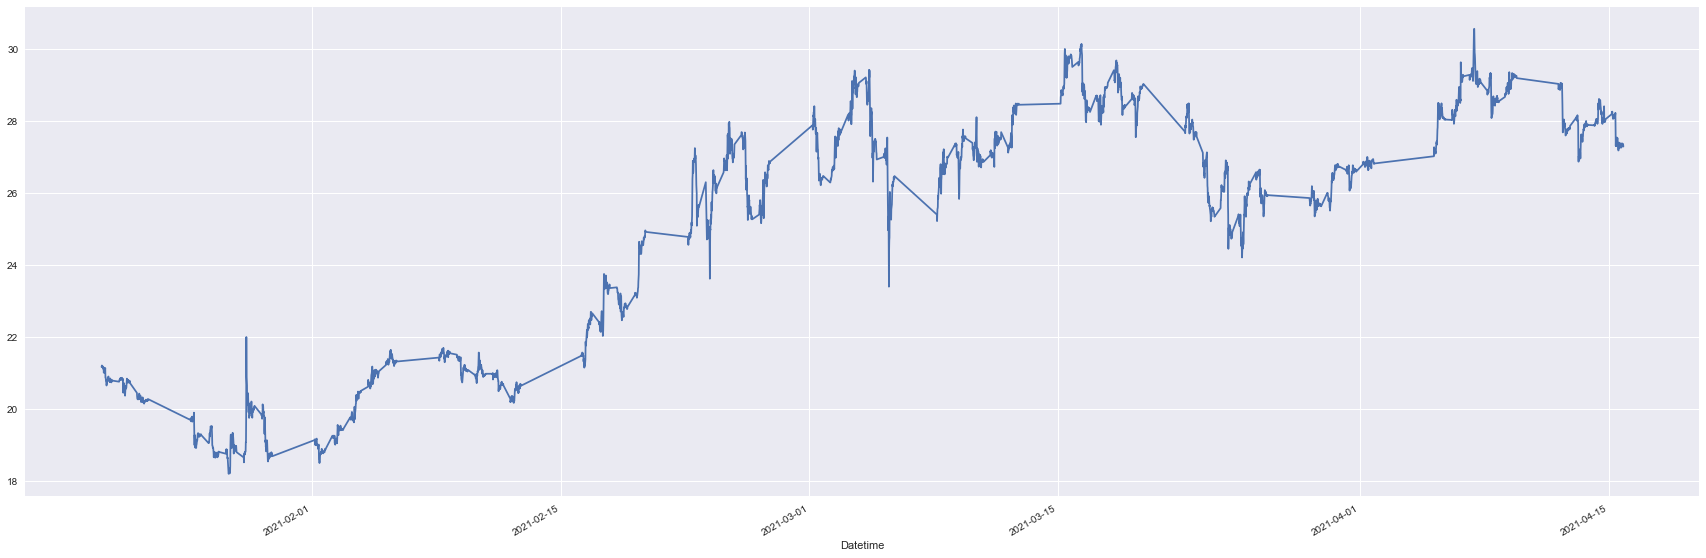

In [1853]:


df.Close.plot(figsize = (30,10))


In [1854]:
# Optional
#df = df.Close

### Changing the absolute values to percents

In [1855]:
close_price_change = df.pct_change()

# 2. Trading Strategies

* Create a strategy that does well in BULL markets.
* Create a strategy that does well in BEAR markets.
* Create charts for both visually showing entry end exit points.
* Figure out how much would be made with a buy and hold strategy
* Create a cumulative returns graph to display the difference

# This strategy does very well in markets that are more on the bear size.
### Meaning that the market doesn't have to be full bear, just at least mostly bear.

In [1856]:
df1 = df.copy()
# Set the short window and long windows
#40,80 works best so far.
short_sma = 40
long_sma = 80

In [1857]:
df1[f"{short_sma} SMA"] = df1.Close.rolling(short_sma).mean() 
df1[f"{long_sma} SMA"] = df1.Close.rolling(long_sma).mean() 

In [1858]:
df1.head(5)

,Close,Open,High,Low,Volume,40 SMA,80 SMA
Datetime,,,,,,,
2021-01-20 04:15:00-05:00,21.16,21.15,21.20,21.10,0,NaN,NaN
2021-01-20 04:30:00-05:00,21.18,21.15,21.20,21.12,0,NaN,NaN
2021-01-20 04:45:00-05:00,21.20,21.13,21.20,21.13,0,NaN,NaN
2021-01-20 05:15:00-05:00,21.18,21.12,21.18,21.06,0,NaN,NaN
2021-01-20 05:30:00-05:00,21.17,21.17,21.18,21.17,0,NaN,NaN


The 1,-1 means that your are long when short sma > long sma, and short otherwise.

In [1859]:
df1['Position'] = np.where(df1[f'{short_sma} SMA'] > df1[f'{long_sma} SMA'],1,-1)

In [1860]:
df1['log_returns'] = np.log(df1['Close'] / df1['Close'].shift(1))

In [1861]:
df1['strategy_returns'] = df1.Position.shift(1) * df1['log_returns']

In [1862]:
df1.dropna(inplace = True)
df1.head()

,Close,Open,High,Low,Volume,40 SMA,80 SMA,Position,log_returns,strategy_returns
Datetime,,,,,,,,,,
2021-01-21 09:30:00-05:00,20.445000,20.700001,20.870001,20.379999,3033372,20.791355,20.868774,-1,-0.018656,0.018656
2021-01-21 09:45:00-05:00,20.558300,20.440001,20.580000,20.320000,1571688,20.785465,20.861253,-1,0.005526,-0.005526
2021-01-21 10:00:00-05:00,20.495001,20.559999,20.600000,20.379999,1074782,20.778088,20.852690,-1,-0.003084,0.003084
2021-01-21 10:15:00-05:00,20.714001,20.500000,20.760000,20.490000,1215949,20.777188,20.846615,-1,0.010629,-0.010629
2021-01-21 10:30:00-05:00,20.594999,20.715000,20.719999,20.559999,566299,20.772438,20.839303,-1,-0.005762,0.005762


#### Cumulative Sum

In [1863]:
df1[['log_returns','strategy_returns']].sum()
# Note that these give you the same ending value
# df1['log_returns'].cumsum()[-1]

log_returns         0.269760
strategy_returns    0.256517
dtype: float64

In [1864]:
df1[['log_returns','strategy_returns']].sum().apply(np.exp) * 1000

log_returns         1309.649544
strategy_returns    1292.420777
dtype: float64

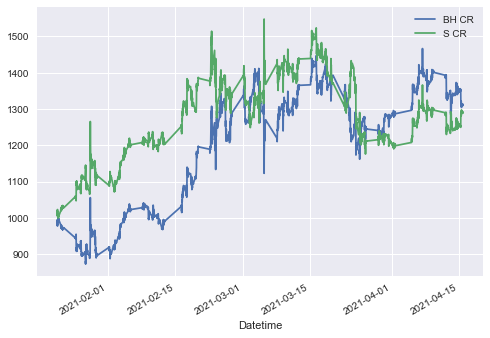

In [1865]:
df1['BH CR'] = df1['log_returns'].cumsum().apply(np.exp) * 1000
df1['S CR'] = df1['strategy_returns'].cumsum().apply(np.exp) * 1000

df1[['BH CR','S CR']].plot()

In [1829]:
exit = df[df['Position'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize entry position relative to total portfolio value
entry = df[df['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize total portoflio value for the investment
total_portfolio_value = df[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Overlay plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(xaxis=None)

KeyError: 'Position'

In [28]:
df['Signal'].value_counts()

1.0    715
0.0    344
Name: Signal, dtype: int64

In [20]:
df['Signal'].value_counts()

1.0    914
0.0    145
Name: Signal, dtype: int64

In [21]:
df['Entry/Exit'].value_counts()

 0.0    1052
 1.0       3
-1.0       3
Name: Entry/Exit, dtype: int64

# 3. Combining Trading Strategies

* Combine the strategies
* Figure out a trigger that allows the model to switch between strategies.
* Backtest the combined strategy
* Compare the cumulative returns of the buy and hold vs this strategy.

# 4. Predictive Model (Doesn't Work)
* Create a model that can predict future prices.
* Check to see if the model is over or underfit.
* Apply the combined strategy with the predicted values
* Backtest /forward test.
* Compare using a cumulative returns graph.

### Seeing which columns actually correlate.
Low correlation does not help the model.
Does high correlation actually do better?    

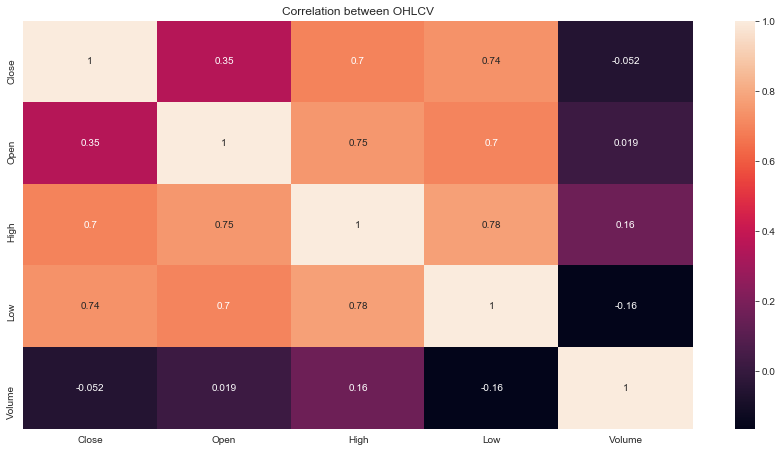

In [22]:
# sns.set_style("darkgrid")
correlation = close_price_change.corr()

fig, ax = plt.subplots(figsize=(15,7.5))
ax.set_title('Correlation between OHLCV')
heat_map = sns.heatmap(data = correlation,
#                        x = correlation.Close,
                       annot=True,
                      ax = ax)
heat_map

## This is to help us easily see which columns have low correlation to Close
### So if you were to decide to put other data in the main dataframe, this would hopefully filter that out if it wasn't useful

In [23]:
print('Correlations')
correlations = pd.DataFrame([correlation[x] for x in correlation][0])
print(correlations)

# Automatically keeping the high correlations
keepers = correlations[correlations.Close> 0.6]
keeper_columns = list(keepers.index)
print('\n\nHigh Correlations')
keeper_columns

Correlations
           Close
Close   1.000000
Open    0.354646
High    0.695476
Low     0.739235
Volume -0.051758


High Correlations


['Close', 'High', 'Low']

### I would say to only keep High and Low

In [24]:
df = df.loc[:,keeper_columns]
df = df[['Low','High','Close']]
df

,Low,High,Close
Date,,,
2017-01-31,813.400024,823.070007,820.190002
2017-02-01,812.250000,824.000000,815.239990
2017-02-02,812.049988,824.559998,818.260010
2017-02-03,819.349976,826.130005,820.130005
2017-02-06,814.289978,822.390015,821.619995
...,...,...,...
2021-04-09,2237.260010,2273.969971,2270.669922
2021-04-12,2227.820068,2256.889893,2244.620117
2021-04-13,2243.050049,2263.469971,2254.429932


### Separating the data into X and y

# THE PROBLEM WITH THIS MODEL
## It doesn't predict into the actual future. It only predicts things that have already happened. 
Pretty lame. I will try to get it to predict future values.

In [25]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [26]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 2 # Close
target_column = 2
X, y = window_data(df, window_size, feature_column, target_column)

In [27]:
split = int(0.80 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
scaler = scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_scaler = scaler.fit(y)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [29]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [31]:
model = Sequential()
number_units = 20
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

KeyboardInterrupt: 

In [ ]:
model.compile(optimizer="adam", loss='mse', metrics = ['mse'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=80, shuffle=False, batch_size=1, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])

stocks.tail()

In [ ]:
stocks.plot(title = "Aint worth shit. But damn. Ain't it pretty", figsize = (30, 10))

# 5. Conclusions
* How did our model do compared to a buy and hold strategy?
    * Buy how much did or didn't it suck.
    * Cumulative returns
    * Risk
    * Number of trades
    * Number of gains / (Number of gains + Number of losses)
    * ## Anything else you guys think would help in the comparison.

# Notes to eventually add to the conclusion.

We learned that using a neural network model to predict stocks is pretty naive. That doesn't seem to be their strong point. They can predict "future" prices so long as they have "future" prices to learn from. The closest I found of someone using them to actually predict future prices was a couple of people who could predict prices one day out. Now if you kept doing this, this model might be of some use. However, I couldn't get that figured out.